In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
log_mini = pd.read_csv('/content/log_mini.csv')
log_mini

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167875,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,16,20,t_360910e8-2a84-42b0-baf1-59abcf96a1f2,False,False,False,True,0,1,...,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone
167876,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,17,20,t_aa2fff77-9b0a-4fa3-a685-ecef50310e8a,False,False,False,True,0,1,...,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone
167877,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,18,20,t_f673e1b7-4ebe-4fc1-ac24-a9f25de70381,False,False,False,True,0,1,...,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone
167878,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,19,20,t_e172e8e7-7161-42a9-acb0-d606346c8f87,False,False,False,True,0,1,...,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone


In [3]:
log_mini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167880 entries, 0 to 167879
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   session_id                       167880 non-null  object
 1   session_position                 167880 non-null  int64 
 2   session_length                   167880 non-null  int64 
 3   track_id_clean                   167880 non-null  object
 4   skip_1                           167880 non-null  bool  
 5   skip_2                           167880 non-null  bool  
 6   skip_3                           167880 non-null  bool  
 7   not_skipped                      167880 non-null  bool  
 8   context_switch                   167880 non-null  int64 
 9   no_pause_before_play             167880 non-null  int64 
 10  short_pause_before_play          167880 non-null  int64 
 11  long_pause_before_play           167880 non-null  int64 
 12  hist_user_behavi

In [4]:
flag = log_mini.copy()

for col in flag:

  if flag[col].dtype != 'int64':
    flag.drop(columns = col, axis = 1, inplace = True)

In [5]:
flag

,session_position,session_length,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hour_of_day
0,1,20,0,0,0,0,0,0,16
1,2,20,0,1,0,0,0,0,16
2,3,20,0,1,0,0,0,0,16
3,4,20,0,1,0,0,0,0,16
4,5,20,0,1,0,0,0,0,16
...,...,...,...,...,...,...,...,...,...
167875,16,20,0,1,0,0,0,0,13
167876,17,20,0,1,0,0,0,0,13
167877,18,20,0,1,0,0,0,0,13
167878,19,20,0,1,0,0,0,0,13


In [6]:
flag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167880 entries, 0 to 167879
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   session_position               167880 non-null  int64
 1   session_length                 167880 non-null  int64
 2   context_switch                 167880 non-null  int64
 3   no_pause_before_play           167880 non-null  int64
 4   short_pause_before_play        167880 non-null  int64
 5   long_pause_before_play         167880 non-null  int64
 6   hist_user_behavior_n_seekfwd   167880 non-null  int64
 7   hist_user_behavior_n_seekback  167880 non-null  int64
 8   hour_of_day                    167880 non-null  int64
dtypes: int64(9)
memory usage: 11.5 MB


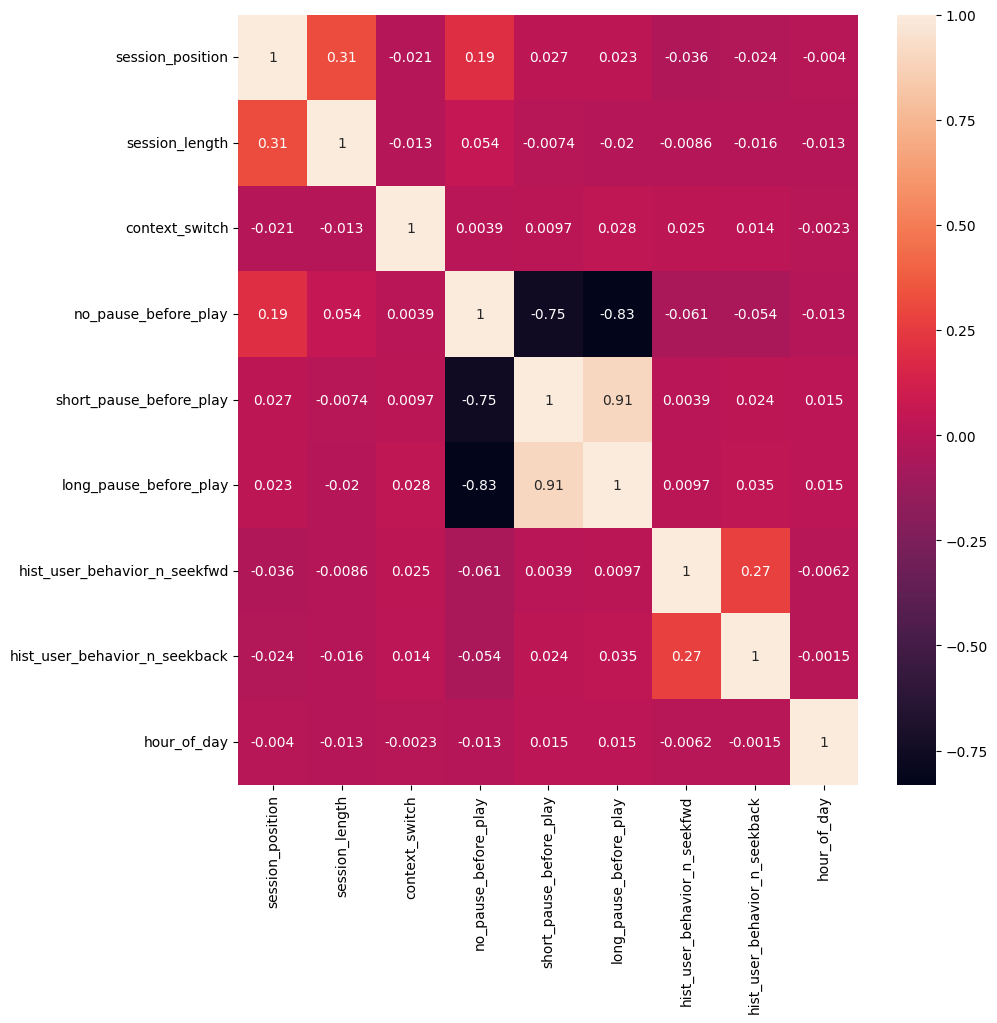

In [7]:
plt.figure(figsize = (10,10))
sns.heatmap(flag.corr(), annot=True)
plt.show()

In [8]:
log_mini.isnull().sum()

session_id                         0
session_position                   0
session_length                     0
track_id_clean                     0
skip_1                             0
skip_2                             0
skip_3                             0
not_skipped                        0
context_switch                     0
no_pause_before_play               0
short_pause_before_play            0
long_pause_before_play             0
hist_user_behavior_n_seekfwd       0
hist_user_behavior_n_seekback      0
hist_user_behavior_is_shuffle      0
hour_of_day                        0
date                               0
premium                            0
context_type                       0
hist_user_behavior_reason_start    0
hist_user_behavior_reason_end      0
dtype: int64

In [9]:
flag = log_mini.copy()

for col in flag:

  if flag[col].dtype != 'bool':
    flag.drop(columns = col, axis = 1, inplace = True)

In [10]:
flag

,skip_1,skip_2,skip_3,not_skipped,hist_user_behavior_is_shuffle,premium
0,False,False,False,True,True,True
1,False,False,False,True,True,True
2,False,False,False,True,True,True
3,False,False,False,True,True,True
4,False,False,False,True,True,True
...,...,...,...,...,...,...
167875,False,False,False,True,False,True
167876,False,False,False,True,False,True
167877,False,False,False,True,False,True
167878,False,False,False,True,False,True


In [11]:
for col in flag:

  print(flag[col].value_counts())
  print("")

False    97118
True     70762
Name: skip_1, dtype: int64

True     86824
False    81056
Name: skip_2, dtype: int64

True     108850
False     59030
Name: skip_3, dtype: int64

False    111996
True      55884
Name: not_skipped, dtype: int64

False    116050
True      51830
Name: hist_user_behavior_is_shuffle, dtype: int64

True     136053
False     31827
Name: premium, dtype: int64



In [12]:
log_mini['skipped'] = log_mini['skip_1'] * log_mini['skip_2'] * log_mini['skip_3']
log_mini.drop(columns = ['skip_1', 'skip_2', 'skip_3', 'not_skipped'], axis = 1, inplace = True)
log_mini

,session_id,session_position,session_length,track_id_clean,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,skipped
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,False
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,False
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,False
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,False
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167875,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,16,20,t_360910e8-2a84-42b0-baf1-59abcf96a1f2,0,1,0,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone,False
167876,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,17,20,t_aa2fff77-9b0a-4fa3-a685-ecef50310e8a,0,1,0,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone,False
167877,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,18,20,t_f673e1b7-4ebe-4fc1-ac24-a9f25de70381,0,1,0,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone,False
167878,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,19,20,t_e172e8e7-7161-42a9-acb0-d606346c8f87,0,1,0,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone,False


In [13]:
log_mini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167880 entries, 0 to 167879
Data columns (total 18 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   session_id                       167880 non-null  object
 1   session_position                 167880 non-null  int64 
 2   session_length                   167880 non-null  int64 
 3   track_id_clean                   167880 non-null  object
 4   context_switch                   167880 non-null  int64 
 5   no_pause_before_play             167880 non-null  int64 
 6   short_pause_before_play          167880 non-null  int64 
 7   long_pause_before_play           167880 non-null  int64 
 8   hist_user_behavior_n_seekfwd     167880 non-null  int64 
 9   hist_user_behavior_n_seekback    167880 non-null  int64 
 10  hist_user_behavior_is_shuffle    167880 non-null  bool  
 11  hour_of_day                      167880 non-null  int64 
 12  date            

In [14]:
flag = log_mini.copy()

for col in flag:

  if flag[col].dtype != 'bool':
    flag.drop(columns = col, axis = 1, inplace = True)

In [15]:
flag

,hist_user_behavior_is_shuffle,premium,skipped
0,True,True,False
1,True,True,False
2,True,True,False
3,True,True,False
4,True,True,False
...,...,...,...
167875,False,True,False
167876,False,True,False
167877,False,True,False
167878,False,True,False


In [16]:
flag.replace({False: 0, True: 1}, inplace=True)

In [17]:
flag

,hist_user_behavior_is_shuffle,premium,skipped
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0
...,...,...,...
167875,0,1,0
167876,0,1,0
167877,0,1,0
167878,0,1,0


In [18]:
log_mini.replace({False: 0, True: 1}, inplace=True)

In [19]:
log_mini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167880 entries, 0 to 167879
Data columns (total 18 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   session_id                       167880 non-null  object
 1   session_position                 167880 non-null  int64 
 2   session_length                   167880 non-null  int64 
 3   track_id_clean                   167880 non-null  object
 4   context_switch                   167880 non-null  int64 
 5   no_pause_before_play             167880 non-null  int64 
 6   short_pause_before_play          167880 non-null  int64 
 7   long_pause_before_play           167880 non-null  int64 
 8   hist_user_behavior_n_seekfwd     167880 non-null  int64 
 9   hist_user_behavior_n_seekback    167880 non-null  int64 
 10  hist_user_behavior_is_shuffle    167880 non-null  int64 
 11  hour_of_day                      167880 non-null  int64 
 12  date            

In [20]:
flag = log_mini.copy()

for col in flag:

  if flag[col].dtype != 'object':
    flag.drop(columns = col, axis = 1, inplace = True)

In [21]:
object_types = flag.columns
object_types

Index(['session_id', 'track_id_clean', 'date', 'context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end'],
      dtype='object')

In [22]:
object_types = object_types[3:]
object_types

Index(['context_type', 'hist_user_behavior_reason_start',
       'hist_user_behavior_reason_end'],
      dtype='object')

In [23]:
log_mini.skipped.value_counts()

0    97118
1    70762
Name: skipped, dtype: int64

In [24]:
log_mini

,session_id,session_position,session_length,track_id_clean,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,skipped
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,0,0,0,0,1,16,2018-07-15,1,editorial_playlist,trackdone,trackdone,0
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,0,1,0,0,0,0,1,16,2018-07-15,1,editorial_playlist,trackdone,trackdone,0
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,0,1,0,0,0,0,1,16,2018-07-15,1,editorial_playlist,trackdone,trackdone,0
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,0,1,0,0,0,0,1,16,2018-07-15,1,editorial_playlist,trackdone,trackdone,0
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,0,1,0,0,0,0,1,16,2018-07-15,1,editorial_playlist,trackdone,trackdone,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167875,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,16,20,t_360910e8-2a84-42b0-baf1-59abcf96a1f2,0,1,0,0,0,0,0,13,2018-07-15,1,user_collection,trackdone,trackdone,0
167876,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,17,20,t_aa2fff77-9b0a-4fa3-a685-ecef50310e8a,0,1,0,0,0,0,0,13,2018-07-15,1,user_collection,trackdone,trackdone,0
167877,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,18,20,t_f673e1b7-4ebe-4fc1-ac24-a9f25de70381,0,1,0,0,0,0,0,13,2018-07-15,1,user_collection,trackdone,trackdone,0
167878,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,19,20,t_e172e8e7-7161-42a9-acb0-d606346c8f87,0,1,0,0,0,0,0,13,2018-07-15,1,user_collection,trackdone,trackdone,0


In [25]:
for col in object_types:

  print(log_mini[col].value_counts())
  print("")

user_collection          67430
catalog                  38263
editorial_playlist       35663
radio                    21107
personalized_playlist     2976
charts                    2441
Name: context_type, dtype: int64

fwdbtn        79912
trackdone     55075
clickrow      17514
backbtn       13034
appload        1942
playbtn         155
remote          136
trackerror       92
endplay          20
Name: hist_user_behavior_reason_start, dtype: int64

fwdbtn       81389
trackdone    57701
endplay      14823
backbtn      13129
logout         563
remote         267
clickrow         8
Name: hist_user_behavior_reason_end, dtype: int64



In [26]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

for col in object_types:

  log_mini[col] = label_encoder.fit_transform(log_mini[col])

In [27]:
log_mini['context_type'].value_counts()

5    67430
0    38263
2    35663
4    21107
3     2976
1     2441
Name: context_type, dtype: int64

In [28]:
log_mini['hist_user_behavior_reason_start'].value_counts()

4    79912
7    55075
2    17514
1    13034
0     1942
5      155
6      136
8       92
3       20
Name: hist_user_behavior_reason_start, dtype: int64

In [29]:
log_mini['hist_user_behavior_reason_end'].value_counts()

3    81389
6    57701
2    14823
0    13129
4      563
5      267
1        8
Name: hist_user_behavior_reason_end, dtype: int64

In [30]:
log_mini

,session_id,session_position,session_length,track_id_clean,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,skipped
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,0,0,0,0,1,16,2018-07-15,1,2,7,6,0
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,0,1,0,0,0,0,1,16,2018-07-15,1,2,7,6,0
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,0,1,0,0,0,0,1,16,2018-07-15,1,2,7,6,0
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,0,1,0,0,0,0,1,16,2018-07-15,1,2,7,6,0
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,0,1,0,0,0,0,1,16,2018-07-15,1,2,7,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167875,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,16,20,t_360910e8-2a84-42b0-baf1-59abcf96a1f2,0,1,0,0,0,0,0,13,2018-07-15,1,5,7,6,0
167876,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,17,20,t_aa2fff77-9b0a-4fa3-a685-ecef50310e8a,0,1,0,0,0,0,0,13,2018-07-15,1,5,7,6,0
167877,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,18,20,t_f673e1b7-4ebe-4fc1-ac24-a9f25de70381,0,1,0,0,0,0,0,13,2018-07-15,1,5,7,6,0
167878,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,19,20,t_e172e8e7-7161-42a9-acb0-d606346c8f87,0,1,0,0,0,0,0,13,2018-07-15,1,5,7,6,0


In [31]:
log_mini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167880 entries, 0 to 167879
Data columns (total 18 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   session_id                       167880 non-null  object
 1   session_position                 167880 non-null  int64 
 2   session_length                   167880 non-null  int64 
 3   track_id_clean                   167880 non-null  object
 4   context_switch                   167880 non-null  int64 
 5   no_pause_before_play             167880 non-null  int64 
 6   short_pause_before_play          167880 non-null  int64 
 7   long_pause_before_play           167880 non-null  int64 
 8   hist_user_behavior_n_seekfwd     167880 non-null  int64 
 9   hist_user_behavior_n_seekback    167880 non-null  int64 
 10  hist_user_behavior_is_shuffle    167880 non-null  int64 
 11  hour_of_day                      167880 non-null  int64 
 12  date            

In [32]:
log_mini.drop(columns = ['session_id', 'date'], axis = 1, inplace = True)

In [33]:
log_mini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167880 entries, 0 to 167879
Data columns (total 16 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   session_position                 167880 non-null  int64 
 1   session_length                   167880 non-null  int64 
 2   track_id_clean                   167880 non-null  object
 3   context_switch                   167880 non-null  int64 
 4   no_pause_before_play             167880 non-null  int64 
 5   short_pause_before_play          167880 non-null  int64 
 6   long_pause_before_play           167880 non-null  int64 
 7   hist_user_behavior_n_seekfwd     167880 non-null  int64 
 8   hist_user_behavior_n_seekback    167880 non-null  int64 
 9   hist_user_behavior_is_shuffle    167880 non-null  int64 
 10  hour_of_day                      167880 non-null  int64 
 11  premium                          167880 non-null  int64 
 12  context_type    

In [34]:
log_mini

,session_position,session_length,track_id_clean,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,skipped
0,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,0,0,0,0,1,16,1,2,7,6,0
1,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,0,1,0,0,0,0,1,16,1,2,7,6,0
2,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,0,1,0,0,0,0,1,16,1,2,7,6,0
3,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,0,1,0,0,0,0,1,16,1,2,7,6,0
4,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,0,1,0,0,0,0,1,16,1,2,7,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167875,16,20,t_360910e8-2a84-42b0-baf1-59abcf96a1f2,0,1,0,0,0,0,0,13,1,5,7,6,0
167876,17,20,t_aa2fff77-9b0a-4fa3-a685-ecef50310e8a,0,1,0,0,0,0,0,13,1,5,7,6,0
167877,18,20,t_f673e1b7-4ebe-4fc1-ac24-a9f25de70381,0,1,0,0,0,0,0,13,1,5,7,6,0
167878,19,20,t_e172e8e7-7161-42a9-acb0-d606346c8f87,0,1,0,0,0,0,0,13,1,5,7,6,0


In [35]:
log_mini.to_csv('processed_sessions.csv')